# Analisis Exploratorio

In [293]:
# Importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from matplotlib import rc
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [294]:
df_train_labels = pd.read_csv('train_labels.csv', low_memory=False)
df_train_values = pd.read_csv('train_values.csv', low_memory=False)

In [295]:
df_train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [296]:
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


## Preprocesamiento y limpieza de datos

In [297]:
df_buildings = pd.merge(df_train_labels, df_train_values, how='inner', on='building_id')
df_buildings.set_index('building_id', inplace=True)
df_buildings.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [298]:
df_buildings.isnull().sum()

damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Vemos que no tenemos ningún tipo de nulos en ninguna de los features. Además, podemos optimizar el uso de memoria en todos los features teniendo en cuenta su valor máximo y mínimo, o si son categóricos o no.

In [299]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   damage_grade                            260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-

### Conversion de tipos de datos

In [300]:
# Conversion de tipos de datos
to_categorical = set(df_buildings.select_dtypes(include='object').columns.tolist())
to_bool = set([col for col in df_buildings.columns if 'has' in col])
to_numeric = set(df_buildings.select_dtypes(include='int64').columns.tolist()) - to_bool

for col in to_categorical:
    df_buildings[col] = df_buildings[col].astype('category')

for col in to_bool:
    df_buildings[col] = df_buildings[col].astype('bool')

for col in to_numeric:
    df_buildings[col] = pd.to_numeric(df_buildings[col], downcast='unsigned')


In [301]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   damage_grade                            260601 non-null  uint8   
 1   geo_level_1_id                          260601 non-null  uint8   
 2   geo_level_2_id                          260601 non-null  uint16  
 3   geo_level_3_id                          260601 non-null  uint16  
 4   count_floors_pre_eq                     260601 non-null  uint8   
 5   age                                     260601 non-null  uint16  
 6   area_percentage                         260601 non-null  uint8   
 7   height_percentage                       260601 non-null  uint8   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                  

## Análisis por Región Geográfica

Analizaremos la información que nos brindan las columnas geo_level_1_id, geo_level_2_id, geo_level_3_id intentando buscar si el terremoto afectó más a alguna zona en particular.

In [302]:
df_buildings

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
28830,2,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
94947,3,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
590882,2,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
201944,3,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,2,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,False,False,False
669485,3,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
602512,3,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,False,False,False


In [303]:
#veo los id de geo_level_1
geo_level_1 = df_buildings.loc[:, ['geo_level_1_id', 'geo_level_2_id']]\
    .groupby(['geo_level_1_id']).count().reset_index()
geo_level_1.rename(columns = {'geo_level_2_id':'cantidad_viviendas_destruidas'}, inplace = True)
geo_level_1

,geo_level_1_id,cantidad_viviendas_destruidas
0,0,4011
1,1,2701
2,2,931
3,3,7540
4,4,14568
5,5,2690
6,6,24381
7,7,18994
8,8,19080
9,9,3958


In [304]:
geo_level_1['geo_level_1_id'].nunique()

31

Podemos obeservar que hay 31 valores únicos de geo_level_1_id, que se corresponden con los 31 valores posibles del enunciado

In [305]:
geo_level_2 = df_buildings.loc[:, ['geo_level_2_id', 'geo_level_3_id']]\
    .groupby(['geo_level_2_id']).count().reset_index()
geo_level_2.rename(columns = {'geo_level_3_id':'cantidad_viviendas_destruidas'}, inplace = True)
geo_level_2.nlargest(10, 'cantidad_viviendas_destruidas')

,geo_level_2_id,cantidad_viviendas_destruidas
38,39,4038
156,158,2520
179,181,2080
1373,1387,2040
155,157,1897
359,363,1760
458,463,1740
666,673,1704
527,533,1684
874,883,1626


In [306]:
geo_level_2['geo_level_2_id'].nunique()

1414

Hay 1414 valores únicos de geo_level_2_id, sin embargo sabemos que puede tomar 1428 valores posibles. Por lo tanto, hay ciertos id's de esta zona que no se vieron afectados por el terremoto.

In [307]:
geo_level_3 = df_buildings.loc[:, ['geo_level_2_id', 'geo_level_3_id']]\
    .groupby(['geo_level_3_id']).count().reset_index()
geo_level_3.rename(columns = {'geo_level_2_id':'cantidad_viviendas_destruidas'}, inplace = True)
geo_level_3

,geo_level_3_id,cantidad_viviendas_destruidas
0,0,2
1,1,6
2,3,9
3,5,14
4,6,21
...,...,...
11590,12562,3
11591,12563,24
11592,12564,6
11593,12565,7


In [308]:
geo_level_3['geo_level_3_id'].nunique()

11595

De los 12567 posibles valores para geo_level_3_id, tan sólo aparecen 11595. Al igual que en el geo level 2, hay ciertos id's de zonas que no fueron afectados por el terremoto.

Estas ubicaciones geográficas faltantes, tanto del level 2 como el 3, pueden ser debido a que no se contabilizaron las viviendas destruidas en esos lugares, o por alguna razón particular esas zonas no se vieron afectadas.

In [309]:
geo_level_1.nsmallest(10, 'cantidad_viviendas_destruidas')


,geo_level_1_id,cantidad_viviendas_destruidas
28,28,265
19,19,372
29,29,396
2,2,931
23,23,1121
24,24,1310
14,14,1714
15,15,2320
30,30,2686
5,5,2690


Cabe destacar que los id's 28, 19 y 29 del geo level 1 resultan ser las zonas menos damnificadas por el terremoto. Suponemos que esto se debe a que esas zonas se encuentran alejadas del epicentro del terremoto. Sin embargo, debido a la ofuscación de los datos, no podemos corroborarlo. A partir del id 2 se triplica la cantidad de viviendas destruidas.

In [310]:
geo_level_1.nlargest(10, 'cantidad_viviendas_destruidas')

,geo_level_1_id,cantidad_viviendas_destruidas
6,6,24381
26,26,22615
10,10,22079
17,17,21813
8,8,19080
7,7,18994
20,20,17216
21,21,14889
4,4,14568
27,27,12532


Los valores 6, 26, 10 y 17 de id correspondientes al geo level 1 representan a las zonas más afectadas por el terremoto.

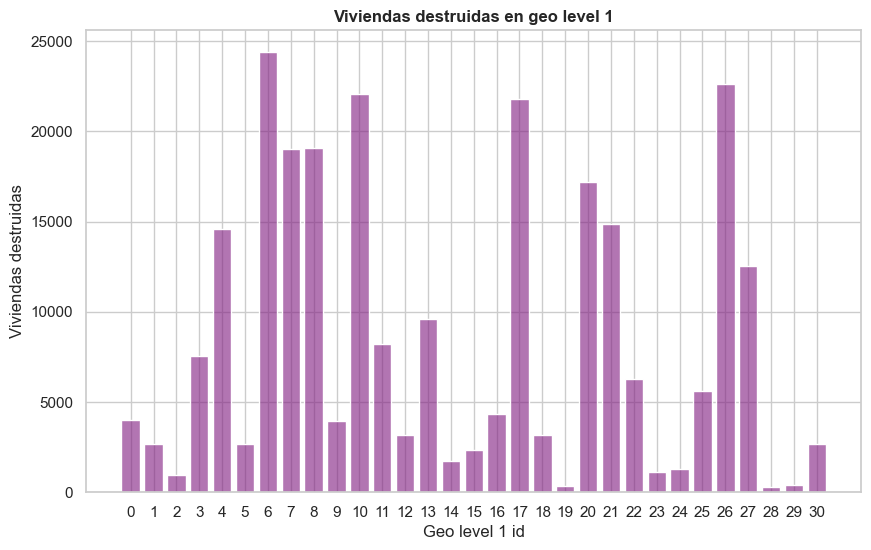

In [311]:
plt.figure(figsize=(10,6))
plt.bar(geo_level_1['geo_level_1_id'], geo_level_1['cantidad_viviendas_destruidas'], color = (0.5,0.1,0.5,0.6))
 
plt.title('Viviendas destruidas en geo level 1', fontweight='bold' )
plt.xlabel('Geo level 1 id')
plt.ylabel('Viviendas destruidas')
 
plt.xticks(np.arange(len(geo_level_1['geo_level_1_id'].to_list())),geo_level_1['geo_level_1_id'].to_list())
 
plt.show()

### ¿Qué nivel de daño tiene cada zona?

In [312]:
df_buildings.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
28830,2,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
94947,3,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
590882,2,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
201944,3,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False


In [313]:
geo_level_1_dmg = df_buildings.loc[:, ['geo_level_1_id', 'geo_level_2_id', 'damage_grade']].reset_index()\
    .groupby(['geo_level_1_id', 'damage_grade']).count().reset_index()
geo_level_1_dmg.rename(columns = {'geo_level_2_id':'cantidad_viviendas_destruidas'}, inplace = True)
dmg_1 = geo_level_1_dmg.loc[geo_level_1_dmg['damage_grade'] == 1,:]
dmg_2 = geo_level_1_dmg.loc[geo_level_1_dmg['damage_grade'] == 2,:]
dmg_3 = geo_level_1_dmg.loc[geo_level_1_dmg['damage_grade'] == 3,:]

#la geo level 1 id 28 no tuvo ninguna viviendo com dmg 1, son todas viviendas con dmg 2 y 3
dmg_1.head(1)

,geo_level_1_id,damage_grade,building_id,cantidad_viviendas_destruidas
0,0,1,337,337


In [314]:
#agregamos una fila con el id 28 para contabilizar que hay 0 viviendas destruidas para ese id con dmg 1
df_aux = pd.DataFrame(columns=['geo_level_1_id','damage_grade', 'building_id', 'cantidad_viviendas_destruidas'])
df_aux
df_aux.loc[0] = [28,1, None, 0]
df_aux

,geo_level_1_id,damage_grade,building_id,cantidad_viviendas_destruidas
0,28.00,1.00,nan,0.00


In [315]:
geo_level_1_dmg = geo_level_1_dmg.append(df_aux, ignore_index=True)

In [316]:
geo_level_1_dmg.sort_values(['geo_level_1_id', 'damage_grade'], inplace=True)

In [317]:
dmg_1 = geo_level_1_dmg.loc[geo_level_1_dmg['damage_grade'] == 1,:]

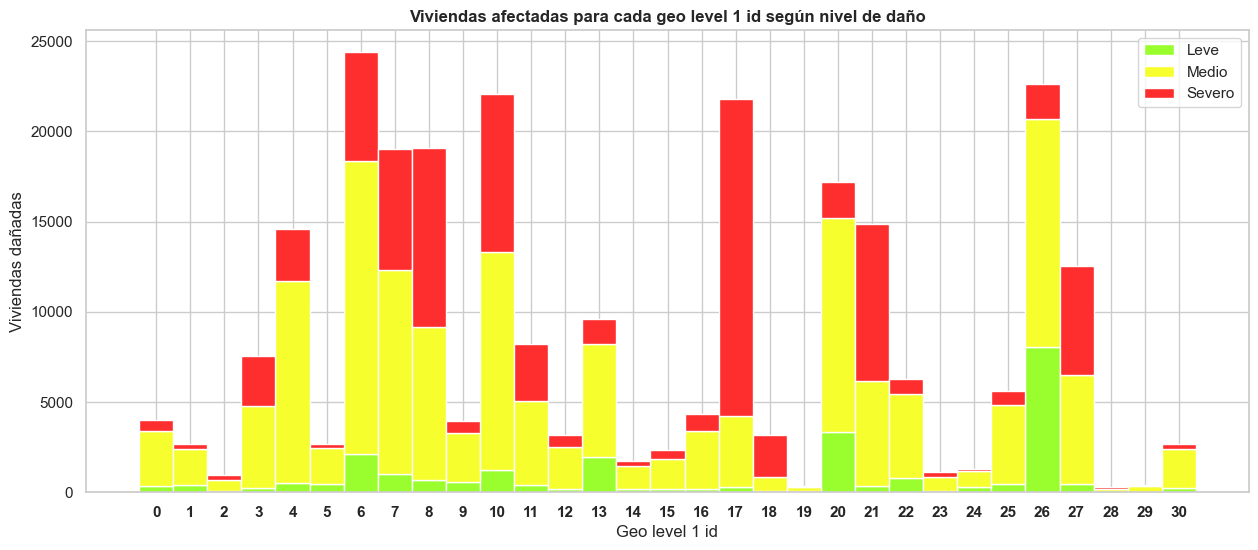

In [318]:
#Viviendas destruidas Vs. Geo Level 1 id
bars1 = dmg_1['cantidad_viviendas_destruidas']
bars2 =  dmg_2['cantidad_viviendas_destruidas']
bars3 = dmg_3['cantidad_viviendas_destruidas']

bars = np.add(bars1.to_list(), bars2.to_list())

r = geo_level_1['geo_level_1_id']
names = geo_level_1['geo_level_1_id']

barWidth = 1

plt.figure(figsize=(15,6))

plt.bar(r, bars1, color='#9AFE2E', edgecolor='white', width=barWidth, label = 'Leve')
plt.bar(r, bars2, bottom=bars1, color='#F7FE2E', edgecolor='white', width=barWidth, label = 'Medio')
plt.bar(r, bars3, bottom=bars, color='#FE2E2E', edgecolor='white', width=barWidth, label = 'Severo')
 
plt.xticks(r, names, fontweight='bold')

plt.xlabel("Geo level 1 id")
plt.ylabel("Viviendas dañadas")
plt.title("Viviendas afectadas para cada geo level 1 id según nivel de daño", fontweight='bold')

plt.legend()
plt.show()

A partir del gráfico presentado anteriormente podemos observar que el geo level 1 con id 17 se destaca notablemente de los demás teniendo la mayor cantidad de viviendas afectadas con un nivel de daño severo.

Otro id notable es el 6 que posee la mayor cantidad de viviendas damnificadas. Sin embargo, su gran mayoría son de daño medio. En contrapartida, remarcamos los id's 19, 28 y 29 por tener ínfimos daños en comparación al resto.

Si bien la zona 26 se encuentra entre las más afectadas, cabe señalar que hubo un gran porcentaje que sólo sufrió daños leves.

### ¿Existe una relación entre el nivel de daño severo y el tipo de suelo?

In [319]:
df_buildings = df_buildings.reset_index()

In [320]:
df_land = df_buildings.loc[df_buildings['damage_grade'] == 3, ['geo_level_1_id', 'land_surface_condition', 'building_id']]\
   .groupby(['geo_level_1_id', 'land_surface_condition']).count().reset_index()

In [321]:
df_land.rename(columns = {'building_id':'cantidad_viviendas_destruidas'}, inplace=True)
df_land_n = df_land.loc[df_land['land_surface_condition'] == 'n', :]
df_land_t = df_land.loc[df_land['land_surface_condition'] == 't', :]
df_land_o = df_land.loc[df_land['land_surface_condition'] == 'o', :]


In [322]:
df_by_land = df_land.groupby('geo_level_1_id').count().reset_index()
df_by_land.head()

,geo_level_1_id,land_surface_condition,cantidad_viviendas_destruidas
0,0,3,3
1,1,3,3
2,2,3,3
3,3,3,3
4,4,3,3


In [323]:
df_by_land.drop(columns = ['land_surface_condition', 'cantidad_viviendas_destruidas'], inplace=True)

In [324]:
df_by_land = df_by_land.merge(df_land_n, on = 'geo_level_1_id')

In [325]:
df_by_land.rename(columns = {'cantidad_viviendas_destruidas' : 'land_n'}, inplace=True)

In [326]:
df_by_land.drop(columns = 'land_surface_condition', inplace = True)

In [327]:
df_by_land = df_by_land.merge(df_land_t, on = 'geo_level_1_id')

In [328]:
df_by_land.rename(columns = {'cantidad_viviendas_destruidas' : 'land_t'}, inplace=True)

In [329]:
df_by_land.drop(columns = 'land_surface_condition', inplace = True)

In [330]:
df_by_land = df_by_land.merge(df_land_o, on = 'geo_level_1_id')

In [331]:
df_by_land.rename(columns = {'cantidad_viviendas_destruidas' : 'land_o'}, inplace=True)

In [332]:
df_by_land.drop(columns = 'land_surface_condition', inplace = True)

In [333]:
df_by_land = df_by_land.set_index('geo_level_1_id')

Text(0.5, 1.0, 'Condición de la superficie terrestre Vs. Viviendas dañadas')

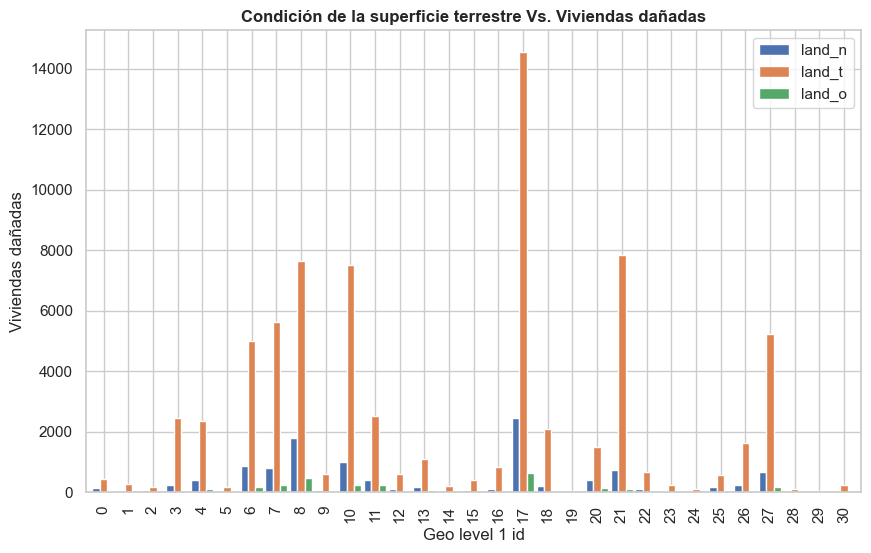

In [334]:
land_plot = df_by_land.plot(kind='bar', figsize=(10,6), width = 0.9)
land_plot.set_ylabel('Viviendas dañadas')
land_plot.set_xlabel('Geo level 1 id')
land_plot.set_title('Condición de la superficie terrestre Vs. Viviendas dañadas', fontweight='bold')

A partir del gráfico anterior podemos visualizar que predomina la condición de superficie terrestre tipo t, por lo que suponemos que este tipo de superficie no es ideal para eventos sísmicos.

Además por el gráfico previo a este, sabíamos que la mayor cantidad de viviendas dañadas con nivel severo se encontraban en el geo level 1 id 17, esto coincide con este gráfico ya que el máximo de viviendas dañadas de suelo t se encuentra en dicha zona.

# Análisis de tipos de cimientos utilizados para la construcción

La idea es ver si existe algún tipo de cimiento más propenso a destruirse ante un terremoto.

In [335]:
df_cimientos = df_buildings.loc[:, ['building_id', 'damage_grade', 'foundation_type']]
df_cimientos_grouped = df_cimientos.groupby(['foundation_type', 'damage_grade']).count().reset_index()

In [336]:
df_cimientos_grouped.rename(columns = {'building_id' : 'cantidad_viviendas_destruidas'}, inplace=True)

In [337]:
df_cimientos['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

Acá ya podemos observar que el tipo de cimiento c es el más utilizado por amplia diferencia con los demás. Por otro lado, el tipo de cimiento h es utilizado muy poco.

In [338]:
cimientos_r = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'r', :]
cimientos_w = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'w', :]
cimientos_u = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'u', :]
cimientos_i = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'i', :]
cimientos_h = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'h', :]
cimientos_h

,foundation_type,damage_grade,cantidad_viviendas_destruidas
0,h,1,358
1,h,2,579
2,h,3,511


In [339]:
cimientos = cimientos_r.merge(cimientos_w, on = 'damage_grade')

In [340]:
cimientos.rename(columns = {'cantidad_viviendas_destruidas_x' : 'foundation_r'\
                       , 'cantidad_viviendas_destruidas_y' : 'foundation_w'},inplace=True)

In [341]:
cimientos.drop(columns = ['foundation_type_x', 'foundation_type_y'], inplace=True)

In [342]:
cimientos = cimientos.merge(cimientos_u)

In [343]:
cimientos.rename(columns = {'cantidad_viviendas_destruidas':'foundation_u'}, inplace=True)

In [344]:
cimientos.drop(columns = 'foundation_type', inplace=True)

In [345]:
cimientos = cimientos.merge(cimientos_i)

In [346]:
cimientos.rename(columns = {'cantidad_viviendas_destruidas':'foundation_i'}, inplace=True)

In [347]:
cimientos.drop(columns = 'foundation_type', inplace=True)

In [348]:
cimientos = cimientos.merge(cimientos_h)

In [349]:
cimientos.rename(columns = {'cantidad_viviendas_destruidas':'foundation_h'}, inplace=True)

In [350]:
cimientos.drop(columns = 'foundation_type', inplace=True)

In [351]:
cimientos.set_index('damage_grade', inplace=True)

Text(0.5, 1.0, 'Viviendas dañadas según tipo de cimientos y nivel de daño')

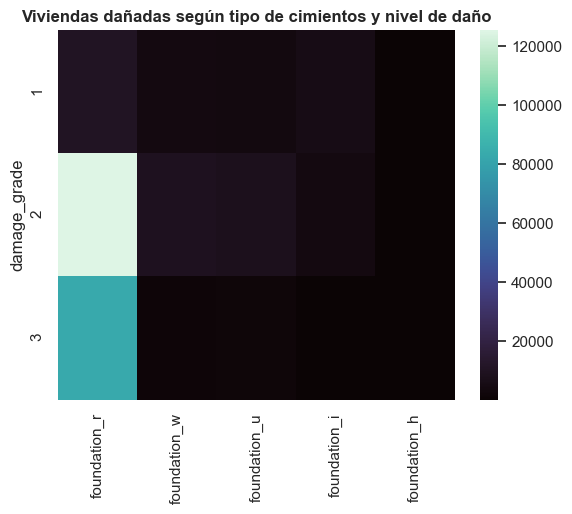

In [352]:
df_cimientos_plot = sns.heatmap(cimientos, cmap = 'mako') #PRGn
df_cimientos_plot.set_title('Viviendas dañadas según tipo de cimientos y nivel de daño', fontweight='bold')

Del gráfico anterior podemos ver que los cimientos del tipo w, u, i, h se comportaron de manera similar frente al terremoto. En todos ellos la cantidad de viviendas destruidas es aproximadamente la misma y no se distinguen notorias diferencias entre los distintos grados de daño.

El único tipo de cimiento a destacar es el del tipo r debido a que se observa que la cantidad de viviendas destruidas aumenta notablemente en comparación a los otros. Además, los daños causados son en su mayoría de grado 2 y 3.

Por estos motivos, suponemos que el cimiento de tipo r es el menos recomendado para la construcción de una casa en zonas propensas a terremotos. 

# Análisis de cantidad de familias por vivienda

Vamos a analizar cuál es la relación de la cantidad de familias viviendo en cada propiedad con la destrucción de esta a raiz del terremoto.

## ¿Existe alguna relación entre la cantidad de familias y el daño recibido a la propiedad?

In [353]:
df_familias = df_buildings.loc[:, ['damage_grade', 'count_families', 'geo_level_1_id']]\
    .groupby(['count_families', 'damage_grade']).count().reset_index()
df_familias.rename(columns = {'geo_level_1_id':'cantidad_viviendas_destruidas'}, inplace = True)

In [354]:
#completamos los valores faltantes de damage grade:
    #count_families=8, damage_grade=3, cantidad_viviendas_destruidas=0
    #count_families=9, damage_grade=3, cantidad_viviendas_destruidas=0
df_aux = pd.DataFrame(columns=['count_families','damage_grade', 'cantidad_viviendas_destruidas'])
df_aux.loc[0] = [8,3,0]
df_aux.loc[1] = [9,3,0]
df_aux

,count_families,damage_grade,cantidad_viviendas_destruidas
0,8,3,0
1,9,3,0


In [355]:
df_familias = df_familias.append(df_aux, ignore_index=True)

In [356]:
df_familias.sort_values(['count_families', 'damage_grade'], inplace=True)

In [357]:
familias_dmg_1 = df_familias.loc[df_familias['damage_grade'] == 1,:]
familias_dmg_2 = df_familias.loc[df_familias['damage_grade'] == 2,:]
familias_dmg_3 = df_familias.loc[df_familias['damage_grade'] == 3,:]

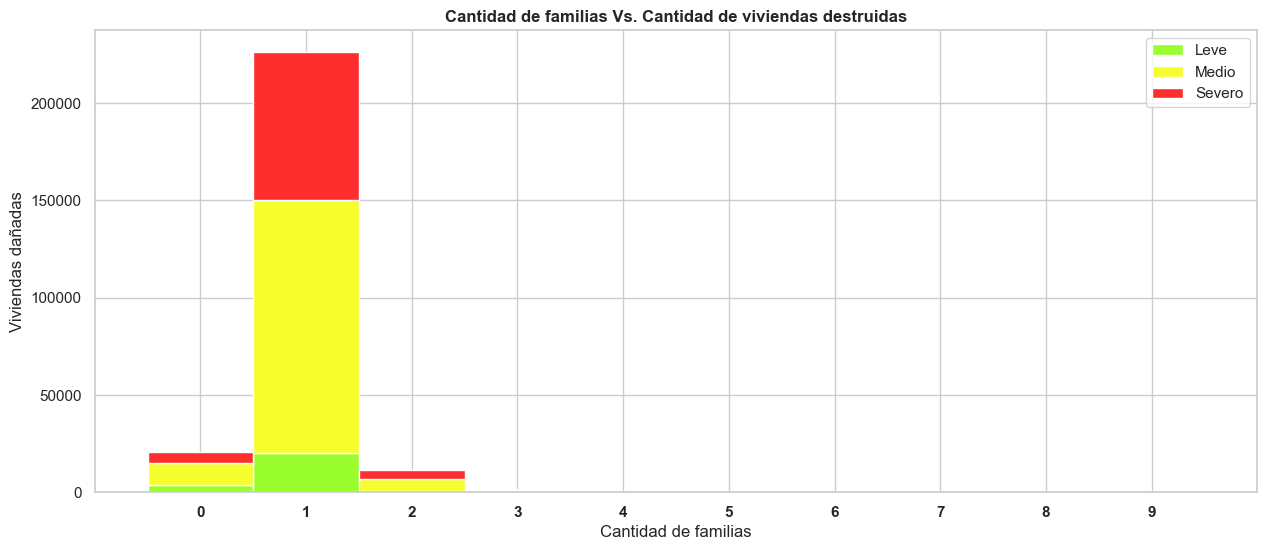

In [358]:
#Cantidad de miembros familiares Vs. cantidad de viviendas destruidas
bars1 = familias_dmg_1['cantidad_viviendas_destruidas']
bars2 = familias_dmg_2['cantidad_viviendas_destruidas']
bars3 = familias_dmg_3['cantidad_viviendas_destruidas']

bars = np.add(bars1.to_list(), bars2.to_list())

r = familias_dmg_1['count_families']
names = familias_dmg_1['count_families']

barWidth = 1

plt.figure(figsize=(15,6))

plt.bar(r, bars1, color='#9AFE2E', edgecolor='white', width=barWidth, label = 'Leve')
plt.bar(r, bars2, bottom=bars1, color='#F7FE2E', edgecolor='white', width=barWidth, label = 'Medio')
plt.bar(r, bars3, bottom=bars, color='#FE2E2E', edgecolor='white', width=barWidth, label = 'Severo')
 
plt.xticks(r, names, fontweight='bold')

plt.xlabel("Cantidad de familias")
plt.ylabel("Viviendas dañadas")
plt.title("Cantidad de familias Vs. Cantidad de viviendas destruidas", fontweight='bold')

plt.legend()
plt.show()

Las viviendas donde se registran un grupo familiar fueron las que sufrieron mas daño por amplia diferencia, tanto de nivel medio como de nivel severo. Le siguen aquellas donde se registran dos familias o ninguna, pero con mas de un 90% de diferencia con el grupo mencionado anteriormente. Esto debe ser porque dichas propiedas (las de 0 grupo familiar) fueron usadas para otro propósito.

En cuanto a nuestra hipótesis inicial, es decir, si existe alguna relación entre la cantidad de viviendas dañadas y la cantidad de familias viviendo en ellas, podemos concluir que no hay tal relación. Los datos de las encuestas no aportan al análisis de la problematica sino que solo nos da información sobre la distribucción poblacional la cual consideramos no tiene relacion con los daños causados por el sismo.

# Análisis de la altura y el área de las viviendas

En esta sección analizaremos la incidencia de la altura y el área de cada vivienda en el daño sufrido.

In [359]:
df_height_area = df_buildings.loc[:, ['area_percentage', 'height_percentage', 'damage_grade', 'land_surface_condition']]\
    .groupby(['area_percentage', 'height_percentage', 'damage_grade']).count().reset_index()

In [360]:
df_height_area.drop(columns = 'land_surface_condition', inplace=True)

In [361]:
df_height_area.loc[df_height_area['damage_grade'] == 1, 'damage_grade'] = 'leve'
df_height_area.loc[df_height_area['damage_grade'] == 2, 'damage_grade'] = 'medio'
df_height_area.loc[df_height_area['damage_grade'] == 3, 'damage_grade'] = 'severo'

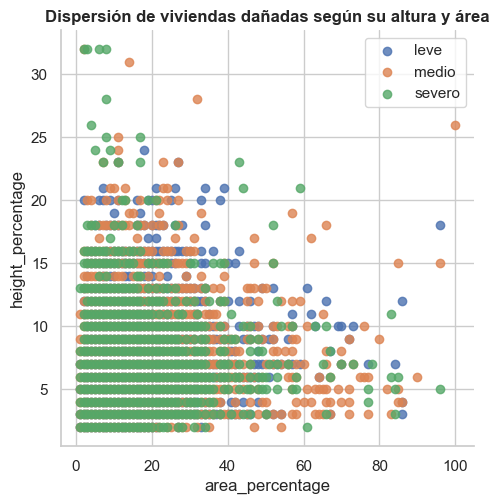

In [362]:
plot_height_area = sns.lmplot( x="area_percentage", y="height_percentage", data=df_height_area, fit_reg=False, hue='damage_grade', legend=False)
 
plt.legend(loc='upper right')
plt.title('Dispersión de viviendas dañadas según su altura y área', fontweight='bold')

plt.show()

En el gráfico de dispersión podemos observar que la mayor cantidad de viviendas destruidas se encuentran entre los valores 0 - 40 de área y 0 - 17 de altura. No podemos asegurar que el área y/o la altura hayan aumentado el nivel de daño sufrido por la vivienda ya que para propiedades de igual valor de área y altura hay distintos niveles de daño.

# Análisis de tipo de suelo y planta baja

Analizaremos a continuación, los distintos tipos de suelos de las propiedades y su relación en el daño recibido.

In [363]:
df_planta_baja = df_buildings.loc[:, ['damage_grade', 'ground_floor_type', 'building_id']]\
    .groupby(['ground_floor_type', 'damage_grade']).count().reset_index()
df_planta_baja.rename(columns = {'building_id':'cantidad_viviendas_destruidas'}, inplace = True)
df_planta_baja

,ground_floor_type,damage_grade,cantidad_viviendas_destruidas
0,f,1,12474
1,f,2,119877
2,f,3,77268
3,m,1,90
4,m,2,343
5,m,3,75
6,v,1,10309
7,v,2,12971
8,v,3,1313
9,x,1,2052


Text(0, 0.5, 'Viviendas dañadas')

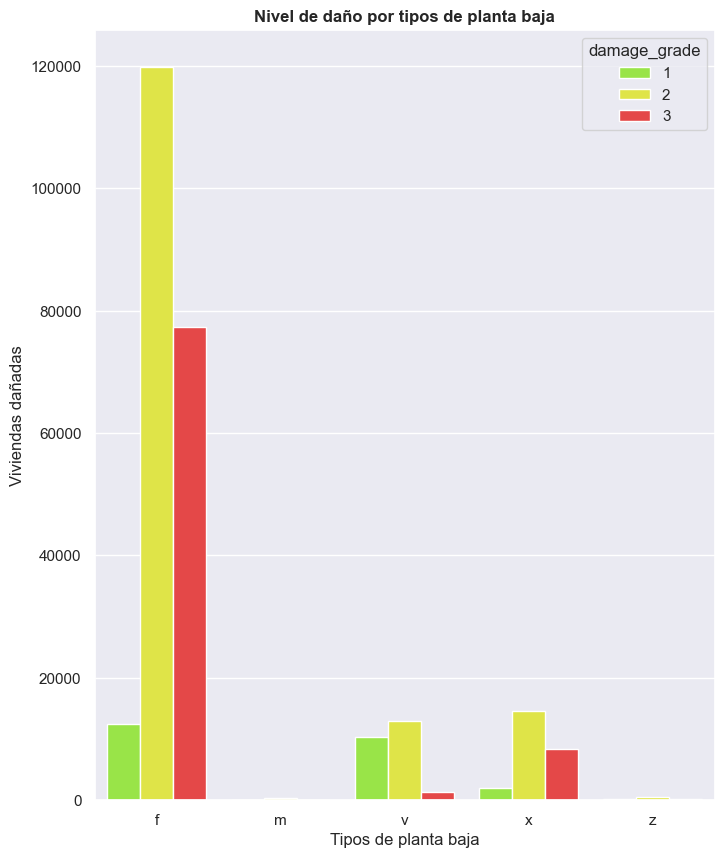

In [364]:
colors = ["#9AFE2E", "#F7FE2E", "#FE2E2E"]
sns.set_palette(sns.color_palette(colors))
sns.set(style="darkgrid")

plt.figure(figsize=(8, 10))

# grouped barplot
planta_baja_plot = sns.barplot(x="ground_floor_type", y="cantidad_viviendas_destruidas", hue="damage_grade", data=df_planta_baja, ci=None, palette = colors);
planta_baja_plot.set_title("Nivel de daño por tipos de planta baja", fontweight='bold')
planta_baja_plot.set_xlabel("Tipos de planta baja")
planta_baja_plot.set_ylabel("Viviendas dañadas")

Se puede apreciar que aquellas viviendas con tipo de planta baja f fueron claramente las más afectadas por el terremoto, recibiendo ampliamente el mayor daño de nivel medio y severo. Para analizar si también hay una influencia del tipo de suelo donde fueron construidas dichas propiedades realizaremos un análisis sobre estas viviendas en particular.

In [365]:
df_planta_baja_tipo_f = df_buildings.loc[df_buildings['ground_floor_type'] == 'f', ['damage_grade', 'land_surface_condition', 'building_id']]\
    .groupby(['land_surface_condition', 'damage_grade']).count().reset_index()
df_planta_baja_tipo_f.rename(columns = {'building_id':'cantidad_viviendas_destruidas'}, inplace = True)
#df_planta_baja_tipo_f.set_index('cantidad_viviendas_destruidas', inplace=True)
#df_planta_baja_tipo_f.sort_index(ascending=False, inplace=True)
df_planta_baja_tipo_f

,land_surface_condition,damage_grade,cantidad_viviendas_destruidas
0,n,1,1514
1,n,2,17920
2,n,3,10140
3,o,1,399
4,o,2,3869
5,o,3,2534
6,t,1,10561
7,t,2,98088
8,t,3,64594


Text(0, 0.5, 'Viviendas dañadas')

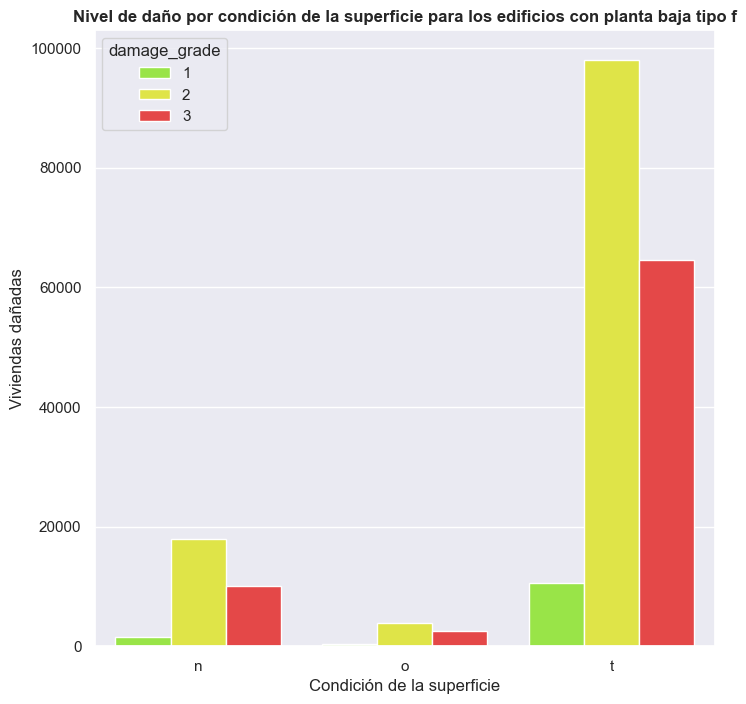

In [366]:
colors = ["#9AFE2E", "#F7FE2E", "#FE2E2E"]
sns.set_palette(sns.color_palette(colors))
sns.set(style="darkgrid")

plt.figure(figsize=(8, 8))

# grouped barplot
planta_baja_plot = sns.barplot(x="land_surface_condition", y="cantidad_viviendas_destruidas", hue="damage_grade", data=df_planta_baja_tipo_f, ci=None, palette = colors);
planta_baja_plot.set_title("Nivel de daño por condición de la superficie para los edificios con planta baja tipo f", fontweight='bold')
planta_baja_plot.set_xlabel("Condición de la superficie")
planta_baja_plot.set_ylabel("Viviendas dañadas")

Con este segundo gráfico, podemos concluir que las viviendas más afectadas por el sismo, son aquellas en donde la propiedad fue construida en una superficie de condición t y con planta baja de tipo f. 

# ¿El estado legal de la propiedad fue un factor influyente?

En el siguiente análisis, veremos si el estado legal de la propiedad tuvo alguna insidencia en el nivel de daño sufrido por la propiedad debido al sismo.

In [367]:
df_estado_legal = df_buildings.loc[:, ['damage_grade', 'legal_ownership_status', 'building_id']]\
    .groupby(['legal_ownership_status', 'damage_grade']).count().reset_index()
df_estado_legal.rename(columns = {'building_id':'cantidad_viviendas_destruidas'}, inplace = True)
df_estado_legal

,legal_ownership_status,damage_grade,cantidad_viviendas_destruidas
0,a,1,1511
1,a,2,3074
2,a,3,927
3,r,1,213
4,r,2,727
5,r,3,533
6,v,1,23270
7,v,2,143154
8,v,3,84515
9,w,1,130


Text(0, 0.5, 'Viviendas dañadas')

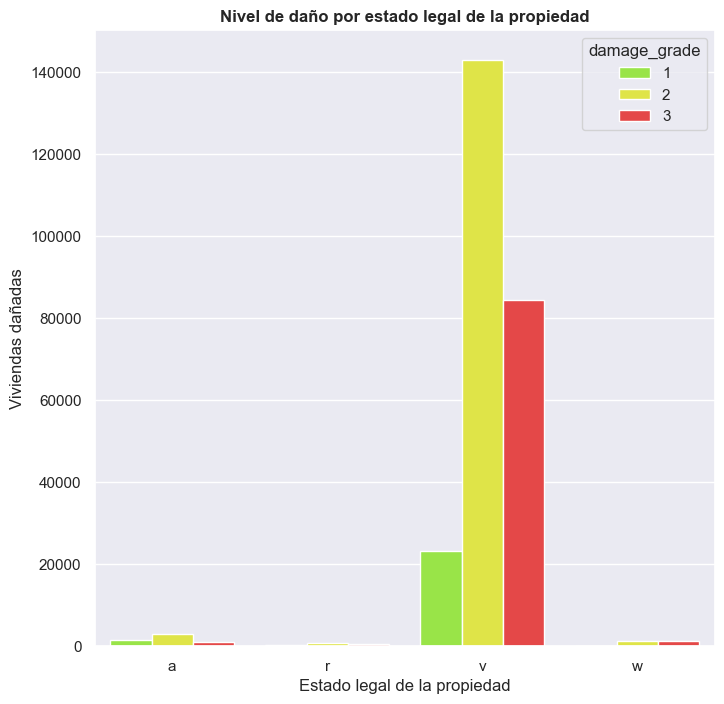

In [368]:
colors = ["#9AFE2E", "#F7FE2E", "#FE2E2E"]
sns.set_palette(sns.color_palette(colors))
sns.set(style="darkgrid")

plt.figure(figsize=(8, 8))

# grouped barplot
estado_legal_plot = sns.barplot(x="legal_ownership_status", y="cantidad_viviendas_destruidas", hue="damage_grade", data=df_estado_legal, ci=None, palette = colors);
estado_legal_plot.set_title("Nivel de daño por estado legal de la propiedad", fontweight='bold')
estado_legal_plot.set_xlabel("Estado legal de la propiedad")
estado_legal_plot.set_ylabel("Viviendas dañadas")

Aparentemente, se concentran la mayor cantidad de viviendas afectadas (en los tres niveles) en las propiedades cuyo estado legal se informa como "v". Debido a que no contamos con más información acerca del significado de los tipos de estado legal de la propiedad, no podemos conjeturar acerca del por qué de este fenómeno.